In [1]:
%load_ext autoreload
%autoreload 1
%aimport news_filter
%aimport sentence_transformer
%aimport solver
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn import metrics

/anaconda3/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda3/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
news_selector = news_filter.NewsFilter('data/tweets.pkl')
transformer = sentence_transformer.SentenceTransformer("../w2v_models/fasttext100.bin", avg_words=10)

Initialising word2vec model...
Initialising is done!
time: 0:00:10.407378


In [3]:
solver_obj = solver.Solver(news_selector=news_selector, transformer=transformer,
                           model=DBSCAN(eps=0.15, min_samples=7, metric='cosine', algorithm='brute'))

In [28]:
solver_obj.check_new_tweets(method='average', tsne=False,
                            model=DBSCAN(eps=0.12, min_samples=3, metric='cosine'))#, algorithm='brute'))

ok
Read 3000 tweets
680
(680, 101)
Start clustering...
number of clusters 28
unique labels 29
Tweets in cluster 5
['RT @Sandy_mustache: Планомерное увеличение бюджетов силовикам и урезание '
 'денег на образование - главный принцип авторитарной страны https:/…',
 'RT @Sandy_mustache: Планомерное увеличение бюджетов силовикам и урезание '
 'денег на образование - главный принцип авторитарной страны https:/…',
 'RT @Sandy_mustache: Планомерное увеличение бюджетов силовикам и урезание '
 'денег на образование - главный принцип авторитарной страны https:/…',
 'RT @Sandy_mustache: Планомерное увеличение бюджетов силовикам и урезание '
 'денег на образование - главный принцип авторитарной страны https:/…',
 'RT @Sandy_mustache: Планомерное увеличение бюджетов силовикам и урезание '
 'денег на образование - главный принцип авторитарной страны https:/…']
----------------------------------------
Tweets in cluster 5
['RT @mueslilavrova: Основатели и владельцы крупнейших американских и '
 'британ

 'к газу в пригороде Якутска в районе Марха. Местный житель пове…',
 'RT @anatolynog: 32 млн. руб - именно такую сумму требуют за подключения дома '
 'к газу в пригороде Якутска в районе Марха. Местный житель пове…',
 'RT @anatolynog: 32 млн. руб - именно такую сумму требуют за подключения дома '
 'к газу в пригороде Якутска в районе Марха. Местный житель пове…']
----------------------------------------
Tweets in cluster 3
['RT @A_Gasparyan: Порошенко открыл дорожный знак. Затмил тем самым достижение '
 'Колумба с большим запасом :) https://t.co/jAA09PmRvl',
 'RT @A_Gasparyan: Порошенко открыл дорожный знак. Затмил тем самым достижение '
 'Колумба с большим запасом :) https://t.co/jAA09PmRvl',
 'RT @A_Gasparyan: Порошенко открыл дорожный знак. Затмил тем самым достижение '
 'Колумба с большим запасом :) https://t.co/jAA09PmRvl']
----------------------------------------
Tweets in cluster 4
['RT @ChiefLiberal: Измир,Стамбул и Анкара 🇹🇷 - митинги против Эрдогана,завтра '
 'выборы - будет 

In [31]:
solver_obj.check_new_tweets(method='average', tsne=True,
                            model=AgglomerativeClustering(linkage='complete', n_clusters=100, affinity='cosine'))#, algorithm='brute'))

ok
Read 3000 tweets
680
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 680 samples in 0.001s...
[t-SNE] Computed neighbors for 680 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 680 / 680
[t-SNE] Mean sigma: 0.587517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.788704
[t-SNE] Error after 300 iterations: 1.566119
Start clustering...
number of clusters 100
unique labels 100
Tweets in cluster 0
[]
----------------------------------------
Tweets in cluster 0
[]
----------------------------------------
Tweets in cluster 0
[]
----------------------------------------
Tweets in cluster 0
[]
----------------------------------------
Tweets in cluster 0
[]
----------------------------------------
Tweets in cluster 0
[]
----------------------------------------
Tweets in cluster 0
[]
----------------------------------------
Tweets in cluster 0
[]
----------------------------------------
Tweets in cluster 0
[]
------------------------

In [32]:
metrics.silhouette_score(solver_obj.new_tweets.drop(['Sentence'], axis=1).values, solver_obj.model.labels_)

-0.20350784

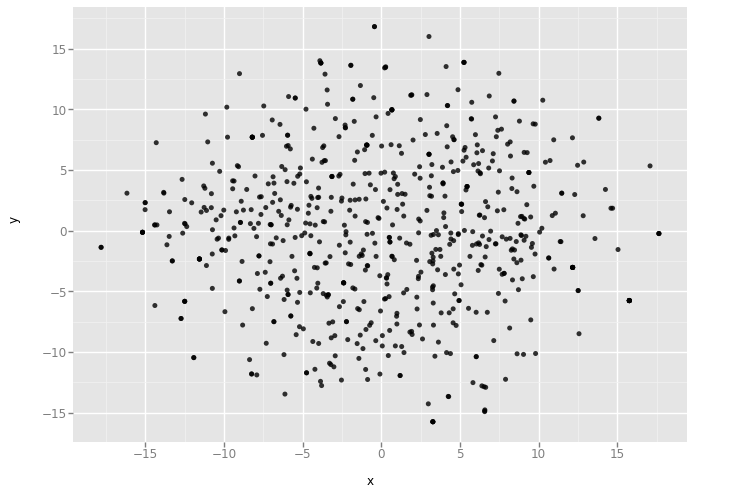

<ggplot: (413493666)>

In [34]:
solver_obj.plot()

In [33]:
solver_obj.new_tweets.drop(['Sentence'], axis=1).values

array([[  0.67478925,  -2.11061144],
       [  8.63290024, -10.15508556],
       [ -0.14422017,   1.00631118],
       ..., 
       [-11.02914333,   7.31340981],
       [ -5.91638184,   7.01318598],
       [  1.44518828, -10.05404854]], dtype=float32)

In [35]:
solver_obj.check_new_tweets(method='average', tsne=True,
                            model=KMeans(n_clusters=100, max_iter=500))#, algorithm='brute'))

ok
Read 3000 tweets
680
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 680 samples in 0.001s...
[t-SNE] Computed neighbors for 680 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 680 / 680
[t-SNE] Mean sigma: 0.587517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.677963
[t-SNE] Error after 300 iterations: 1.620977
Start clustering...
number of clusters 100
unique labels 100
Tweets in cluster 5
['RT @zmeika_z: Народ! Пора объединяться и сказать свое веское НЕТ повышению '
 'пенсионного возраста и новой пенсионной реформе. Пора понять, чт…',
 'RT @GazetaOgazetakh: Навальный врет своей аудитории о перспективах повышения '
 'пенсионного возраста\n'
 '#ГазетаОгазетах #ложьсми #опровержение\n'
 'ht…',
 'RT @LyapunovS: Вы голосовали не за Путина, а за повышение пенсионного '
 'возраста. Просто вы слишком глупы чтобы это понять.',
 'RT @zmeika_z: Народ! Пора объединяться и сказать свое веское НЕТ повышению '
 'пенсионного возраста

----------------------------------------
Tweets in cluster 4
['На президента Зимбабве совершено покушение https://t.co/AWyXDGY7Bw via '
 '@anewsfeed',
 'RT @izvestia_ru: На президента Зимбабве совершено покушение. ВИДЕО '
 'происшествия:\n'
 'https://t.co/zwfnCI6rh1 https://t.co/yK5MuPruK6',
 'В столице Эфиопии во время выступления премьер-министра произошел взрыв '
 'https://t.co/oqL6qZAg2h https://t.co/E0yQeM6FP9',
 'RT @kpru: В Зимбабве произошло покушение на президента страны\n'
 'https://t.co/Cnc1LaDmcm https://t.co/ESPhoKTPQD']
----------------------------------------
Tweets in cluster 5
['@pani_walewska @mix_voronezh Если бы только политических. Расстреливали '
 'вообще всех заключённых и подследственных,… https://t.co/b5g0Nq92SC',
 'RT @solovev93__2009: Известная\xa0фотография\xa0расстрела гитлеровскими '
 'горными стрелками двух мужественно держащихся пленных красноармейцев на в…',
 'RT @solovev93__2009: Известная\xa0фотография\xa0расстрела гитлеровскими '
 'горными стрелками 

In [37]:
solver_obj.check_new_tweets(method='average', tsne=True,
                            model=KMeans(n_clusters=60, max_iter=500))

ok
Read 3000 tweets
680
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 680 samples in 0.001s...
[t-SNE] Computed neighbors for 680 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 680 / 680
[t-SNE] Mean sigma: 0.324907
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.242996
[t-SNE] Error after 300 iterations: 1.662836
Start clustering...
number of clusters 60
unique labels 60
Tweets in cluster 5
['RT @Kornilov1968: Кстати, к вопросу о «пустом» Крыме. Людей в аэропорту '
 'Симферополя море. Рейсы взлетают каждые 10-15 минут. И забиты под з…',
 'RT @Kornilov1968: Кстати, к вопросу о «пустом» Крыме. Людей в аэропорту '
 'Симферополя море. Рейсы взлетают каждые 10-15 минут. И забиты под з…',
 'RT @delyagin: Канал "Россия на колесах" "Яндекс-дзен" предупреждает всех, '
 'кто едет на юг - в Крым или на курорты Краснодарского края - по т…',
 'RT @mix_voronezh: Под #Воронеж самолет напугал жителей летая в 20 метрах над '
 'крышами дом

 '\n'
 '✅ Но зачем инвестировать в… https://t.co/t8vrLl2d2v',
 'https://t.co/xUP7JJh3Vy\n'
 '«Короеды»-контрабандисты наживались на уничтожении леса\n'
 '#Украина #криминал #контрабанда #контрабандисты #СБУ',
 '@snob_project На иностранцев полиция и ОМОН смотрят пока со снисходительно, '
 'а российских граждан за любой карнавал будут бить или убивать',
 'RT @vlad_zhukovskiy: В янв-апреле чистый вывоз капитала из #РФ госолигархами '
 'и госбанками превысил 23,3 млрд долл (1,4 трлн руб)\n'
 'Ещё 25,9 м…',
 '@Dedskasalbabke Считаете ли вы что это решит или ухудшит связи с союзниками?',
 'RT @edikmak1970: @Olechkachkachka Как то ещё стало понятнее, что с властью, '
 'обремененной криминальными отношениями,  в обозримом будущем ни…',
 'RT @lentaruofficial: Сексуальных домогательств в самолетах становится все '
 'больше. ФБР призывает быть бдительными!\n'
 '\n'
 'https://t.co/6VTj7skba6…']
----------------------------------------
Tweets in cluster 5
['Ну и швейцарцы! Ну и Шакири!',
 'RT @del

In [39]:
solver_obj.check_new_tweets(method='average', tsne=True,
                            model=DBSCAN(eps=0.5, min_samples=3, metric='euclidean'))#, algorithm='brute'))

ok
Read 3000 tweets
680
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 680 samples in 0.001s...
[t-SNE] Computed neighbors for 680 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 680 / 680
[t-SNE] Mean sigma: 0.587517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.248856
[t-SNE] Error after 300 iterations: 1.663959
Start clustering...
number of clusters 78
unique labels 79
Tweets in cluster 5
['RT @CurrentTimeTv: Главный конкурент Эрдогана на выборах вывел на митинг '
 'миллионы своих сторонников https://t.co/6faqwLxnUa https://t.co/op…',
 'Выборы в Турции: На митинг главного оппонента Эрдогана вышли миллионы В '
 'Стамбуле за день до президентских выборов миллионы людей собрались',
 'RT @Capricor__Maria: Тем временем у турков...\n'
 '\n'
 'Два миллиона турков вышли на митинги в поддержку соперника Эрдогана на '
 'выборах.\n'
 'По опросам Э…',
 'В Стамбуле миллионы людей вышли на митинг в поддержку опонента Эрдогана.',
 'RT